In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
from uncertainties import ufloat
from uncertainties import umath
import math

def calculateTimeIntervall(filename, peaks):
    f = open(filename, "r")
    n=float(f.readlines()[6][16:21])
    steps=[]
    for i in range(len(peaks)-1):
        steps.append(peaks[i+1]-peaks[i])
    print(n)
    return ufloat((n*np.array(steps)).mean(), (n*np.array(steps)).std())

def smallTimeIntervall(filename, peaks):
    f = open(filename, "r")
    n=float(f.readlines()[6][16:21])
    steps=[]
    for i in range(len(peaks)-1):
        steps.append(peaks[i+1]-peaks[i])
    return n*np.array(steps)

sns.set_theme(style="ticks")
sns.set_context("paper")



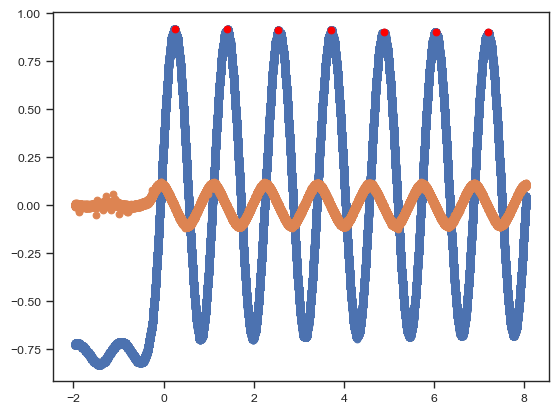

[ 27620  42214  56328  70887  85722  99935 114561]


TypeError: can't multiply sequence by non-int of type 'float'

In [18]:
filename="T0005.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000, height=0.5)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period_1=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period_1))

Please note that all of the DataFrames are just named df as it is easier to manipulate the code.
It is recommended to calculate the desired result in the block of code where it is.

The following block of code was used to determmine which group of maximum values are a part of the maximum, it is not all that practical since we use more computer resources, for the calculation, for which we already have a simpler solution.

C:\Users\andri\AppData\Local\Temp\ipykernel_12408\1319115789.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peaks=np.array(scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000))


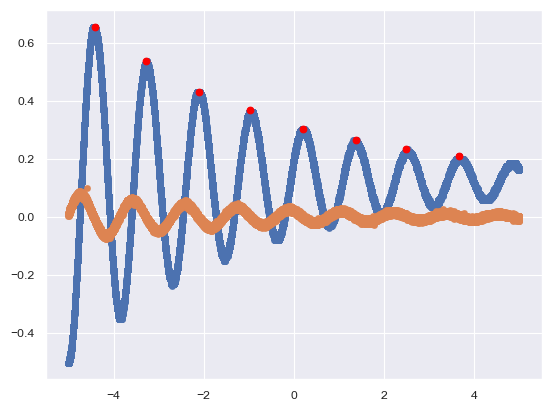

<class 'numpy.ndarray'>
8e-05
Period of the undamped Oscillator: 1.152+/-0.019


C:\Users\andri\AppData\Local\Temp\ipykernel_12408\1319115789.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peaks=np.array(scipy.signal.find_peaks(df["CH1"], prominence=0.1))
C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


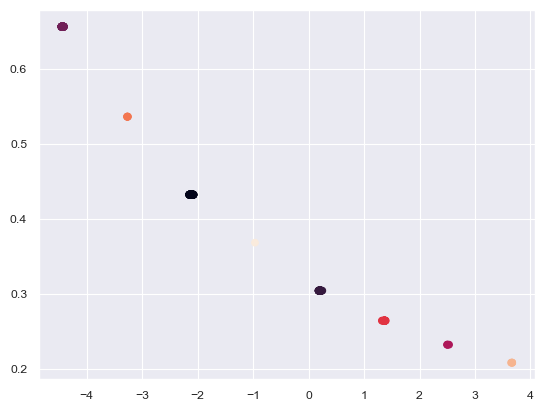

422


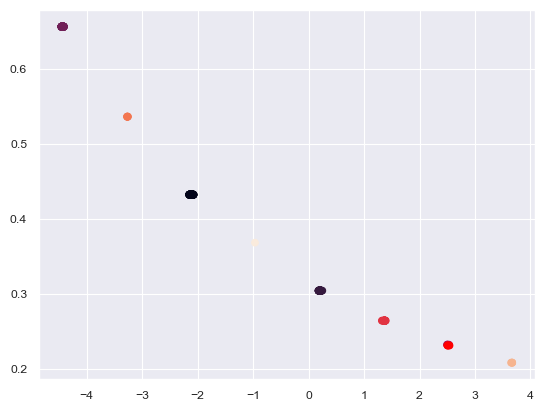

[0 1 2 3 4 5 6 7]
0.232 0.0


In [186]:
filename="T0001.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"], linewidth=0.1)
plt.scatter(df["TIME"], df["CH2"], linewidth=0.1)
peaks=np.array(scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000))
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(type(peaks[0]))
res_period=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period))
from sklearn.cluster import AgglomerativeClustering
peaks=np.array(scipy.signal.find_peaks(df["CH1"], prominence=0.1))
x=df["TIME"][peaks[0]]
y=df["CH1"][peaks[0]]
data=list(zip(x, y))
hierarchial_cluster=AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
labels=hierarchial_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()
print(len(labels))
n=x.where(labels==3)
p=y.where(labels==3)
plt.scatter(x, y, c=labels)
plt.scatter(n, p, color="red")
plt.show()
array=np.array(labels)
print(np.unique(array))
print(p.mean(), p.std())

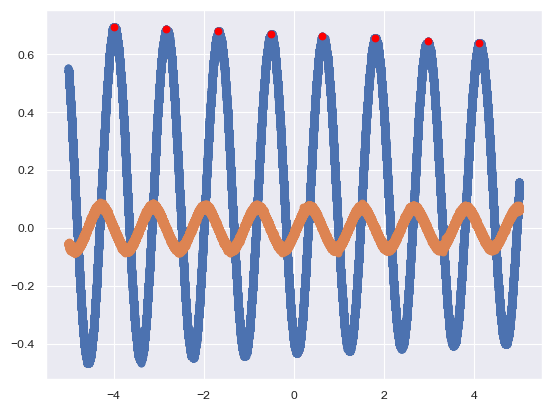

[ 12718  27127  41448  56052  70279  85092  99712 113760]
8e-05
Period of the undamped Oscillator: 1.155+/-0.019


In [187]:
filename="T0002.CSV"
df=pd.read_csv(filename, header=14) #the part in this block unnecessary
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period))

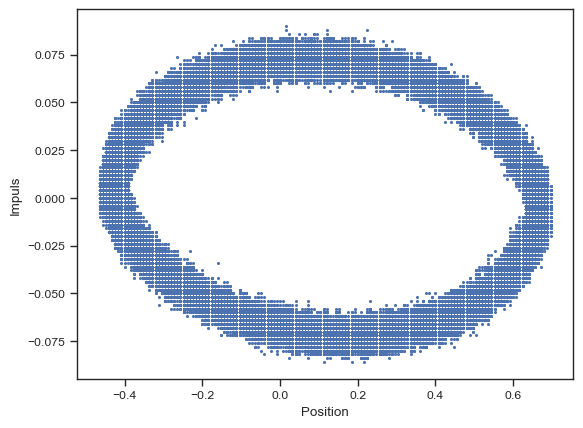

In [10]:
filename="T0002.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["CH1"], df["CH2"], s=2)
plt.xlabel("Position")
plt.ylabel("Impuls")
plt.savefig("ohneDaempfung.png", dpi=500, bbox_inches="tight")
plt.show()

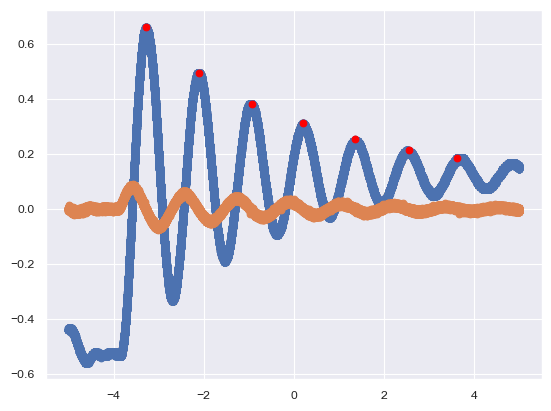

[ 21506  36242  50809  65118  79465  94354 107588]
8e-05
Period of the undamped Oscillator: 1.15+/-0.04


In [189]:
filename="T0003.CSV"
df=pd.read_csv(filename, header=14) #the part in this block unnecessary
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period))

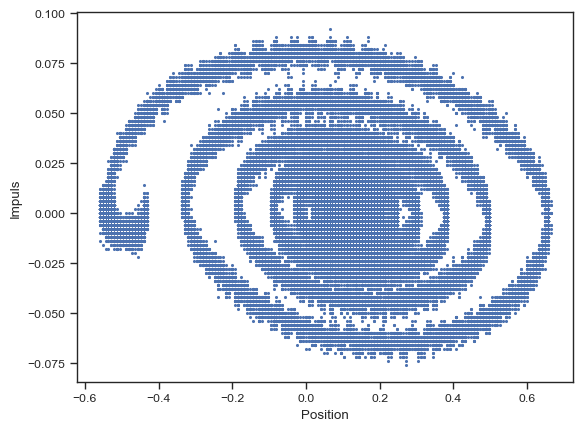

In [11]:
filename="T0003.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["CH1"], df["CH2"], s=2)
plt.xlabel("Position")
plt.ylabel("Impuls")
plt.savefig("mitDaempfung.png", dpi=500, bbox_inches="tight")
plt.show()

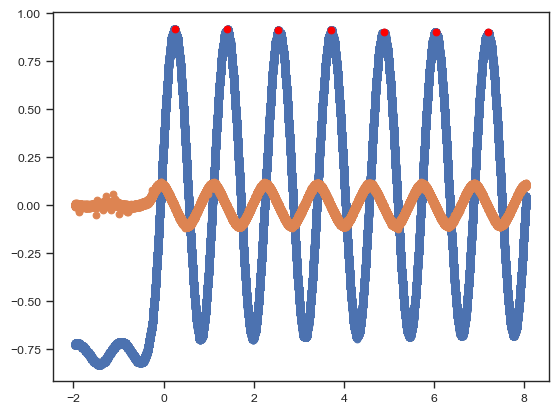

[ 27620  42214  56328  70887  85722  99935 114561]


AttributeError: 'numpy.ndarray' object has no attribute 'strip'

In [13]:
filename="T0005.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000, height=0.5)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period_1=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period_1))

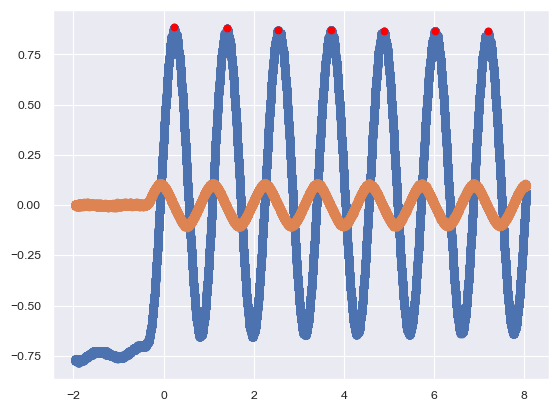

[ 27372  42088  56234  70840  85584  99635 114474]
8e-05
Period of the undamped Oscillator: 1.161+/-0.024


In [199]:
filename="T0006.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000, height=0.5)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period_2=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period_2))

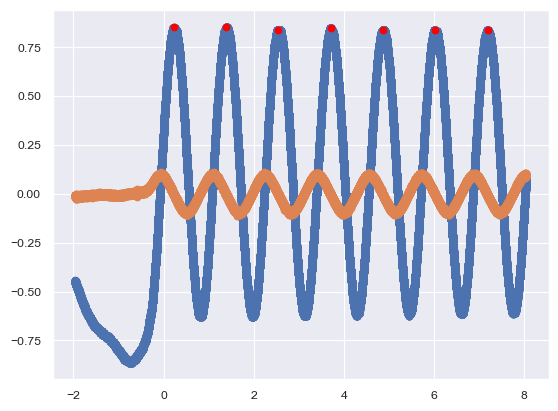

[ 27317  41932  56321  70957  85198  99800 114323]
8e-05
Period of the undamped Oscillator: 1.160+/-0.011


In [200]:
filename="T0007.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000, height=0.5)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period_3=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period_3))

Caclucaltion of the Period of the undamped pendulum

In [228]:
T_0=(res_period_1 + res_period_2 + res_period_3)/3 #period undamped
print(T_0)

1.160+/-0.011


8e-05
Period of the damped Oscillator: 1.150+/-0.027
[1.17976 1.14288 1.1496  1.1816  1.14248 1.10248]
Dämpfungsverhältnis: 2.0+/-0.4


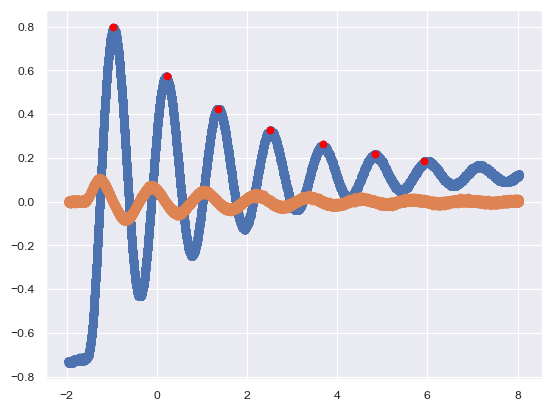

In [241]:
filename="T0008.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")

#print(peaks[0])
res_period_4=calculateTimeIntervall(filename, peaks[0])
print("Period of the damped Oscillator: " + str(res_period_4))
T_1=smallTimeIntervall(filename, peaks[0])
print(T_1)
lambda1=ufloat(np.sqrt(4*math.pi*abs(T_1**2/T_0.n**2-1)).mean(), np.sqrt(4*math.pi*abs(T_1**2/T_0.n**2-1)).std())
print("Dämpfungsverhältnis: " + str(umath.exp(lambda1)))
#plt.plot(df["TIME"], np.exp(-beta1.mean()*df["TIME"]), color="red", linestyle="dashed")
plt.show()

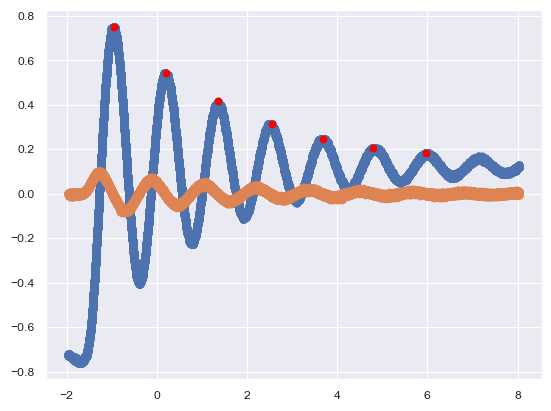

[12503 26924 41467 56309 70448 84317 99060]
8e-05
Period of the damped Oscillator: 1.154+/-0.027
[1.15368 1.16344 1.18736 1.13112 1.10952 1.17944]
Dämpfungsverhältnis: 1.9+/-0.5


In [242]:
filename="T0009.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period_5=calculateTimeIntervall(filename, peaks[0])
print("Period of the damped Oscillator: " + str(res_period_5))
T_1=smallTimeIntervall(filename, peaks[0])
print(T_1)
lambda2=ufloat(np.sqrt(4*math.pi*abs(T_1**2/T_0.n**2-1)).mean(), np.sqrt(4*math.pi*abs(T_1**2/T_0.n**2-1)).std())
print("Dämpfungsverhältnis: " + str(umath.exp(lambda2)))

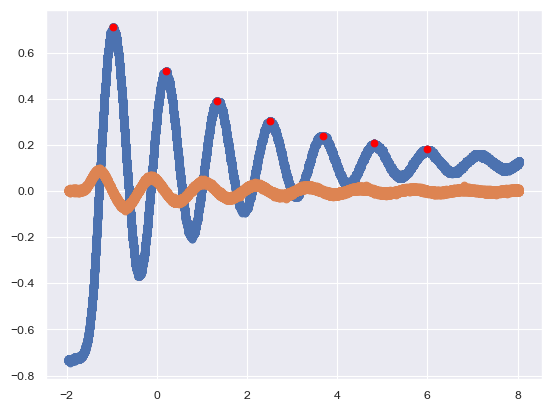

[12394 27160 41269 55809 70698 84583 99349]
8e-05
Period of the damped Oscillator: 1.159+/-0.030
[1.18128 1.12872 1.1632  1.19112 1.1108  1.18128]
Dämpfungsverhältnis: 2.0+/-0.5


In [243]:
filename="T0010.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period_6=calculateTimeIntervall(filename, peaks[0])
print("Period of the damped Oscillator: " + str(res_period_6))
T_1=smallTimeIntervall(filename, peaks[0])
print(T_1)
lambda3=ufloat(np.sqrt(4*math.pi*abs(T_1**2/T_0.n**2-1)).mean(), np.sqrt(4*math.pi*abs(T_1**2/T_0.n**2-1)).std())
print("Dämpfungsverhältnis: " + str(umath.exp(lambda3)))

Calculation of the period of the damped pendulum

In [212]:
period_damped=(res_period_4+res_period_5+res_period_6)/3
print(period_damped)

1.154+/-0.016


In [244]:
print(T_0)

1.160+/-0.011


0.9950124306164744+/-0.016809907279506653